In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

36044


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import anndata
import scanpy as sc
import os

import matplotlib.pyplot as plt


In [3]:
from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width, _double_col_width

In [4]:
#figure_folder = r'L:\Shiwei\RNA_MERFISH_analysis\Merged_nonclear' # from shiwei
figure_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817'
print(figure_folder)
dark = False
if dark:
    merfish_figure_folder = os.path.join(figure_folder, 'MERFISH', 'dark')
    plt.style.use('dark')
else:
    merfish_figure_folder = os.path.join(figure_folder, 'MERFISH', 'light')
    plt.style.use('default')

if not os.path.exists(merfish_figure_folder):
    print(f"Create: {merfish_figure_folder}")
    os.makedirs(merfish_figure_folder)
else:
    print(f"Use: {merfish_figure_folder}")
    
sc.settings.n_jobs = 44
sc.settings.set_figure_params(dpi=150, dpi_save=300, frameon=False, 
                              figsize=(_single_col_width,_single_col_width), 
                              fontsize=_font_size, facecolor='white', transparent=True)
sc.settings.figdir = merfish_figure_folder

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0817\MERFISH\light


# Load data

In [5]:
save_folder = r'\\crick\SSD_0\Shiwei\RNA_MERFISH_analysis\Merged_nonclear'
merged_adata = sc.read(os.path.join(save_folder,'new_labeled_data.h5ad'))

In [6]:
adata_ori = merged_adata.raw.to_adata()
adata_ori

AnnData object with n_obs × n_vars = 62732 × 242
    obs: 'fov', 'volume', 'center_x', 'center_y', 'min_x', 'max_x', 'min_y', 'max_y', 'experiment', 'n_genes_by_counts', 'total_counts', 'doublet_score', 'predicted_doublet', 'leiden', 'leiden_subclass', 'subclass_prediction_label', 'leiden_subclass_sub', 'subclass_manual_label', 'subclass_manual_label_predict', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'dendrogram_subclass_label_new', 'experiment_colors', 'leiden', 'leiden_colors', 'leiden_subclass_colors', 'leiden_subclass_sub_colors', 'neighbors', 'pca', 'scrublet', 'subclass_label_new_colors', 'subclass_manual_label_colors', 'subclass_prediction_label_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    obsp: 'connectivities', 'distances'

In [36]:
cmap_subclass = {    
    'L2/3 IT': '#E6E650',
    'L4/5 IT': '#da8046',
    'L5 IT': '#1CE6FF',
    'L6 IT': '#FF00FF',
    'L6 IT Car3': '#5100FF',
    'L5 ET': '#008941',
    'L5/6 NP': '#006FA6',
    'L6 CT': '#A30059',
    'L6b': '#0000ff',
    'Lamp5': '#7A4900',
    'Sncg': '#0000A6',
    'Vip': '#63FFAC',
    'Sst': '#B79762',
    'Pvalb': '#004D43', 
    'Sst Chodl':'#997D87',
    'Astro':'#B05B6F',
    'Endo':'#8CD0FF',
    'PVM':'#04F757',
    'Micro':'#C8A1A1',
    'OPC':'#1E6E00',
    'Oligo':'#7900D7',
    'Peri':'#A77500',
    'SMC':'#6367A9',
    'VLMC':'#A05837',
    'other':'#6B002C'
    }
adata_ori.uns['subclass_label_new_colors'] = [cmap_subclass[_sub_cls] 
                                                 for _sub_cls in np.unique(adata_ori.obs['subclass_label_new'])]  

<IPython.core.display.Javascript object>


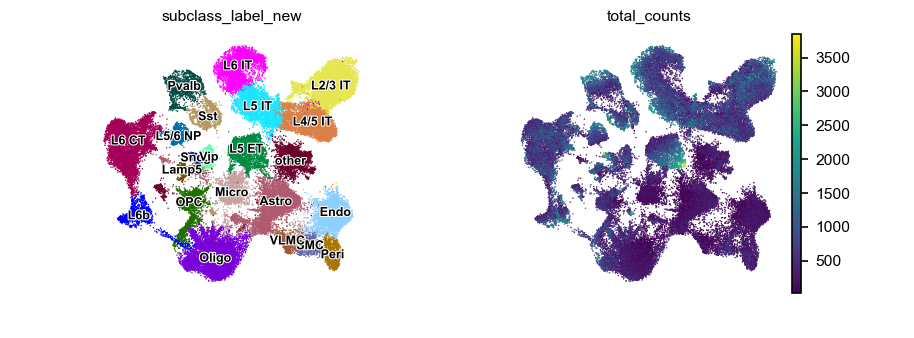

In [39]:
sc.pl.umap(adata_ori, color=['subclass_label_new', 'total_counts'], legend_loc='on data',
           legend_fontsize=6.,legend_fontoutline=1)
plt.show()

<IPython.core.display.Javascript object>


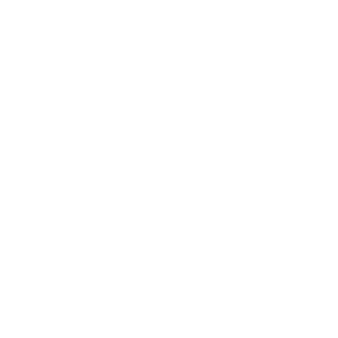

In [44]:
sc.pl.umap(adata_ori, color='subclass_label_new', legend_loc='on data',
           legend_fontsize=6.,legend_fontoutline=0.5, title='',
           save='_total_subclass.pdf')
plt.show()

In [41]:
experiments = np.unique(merged_adata.obs['experiment'])
print(experiments)

['20220304' '20220329' '20220415' '20220418']


<IPython.core.display.Javascript object>


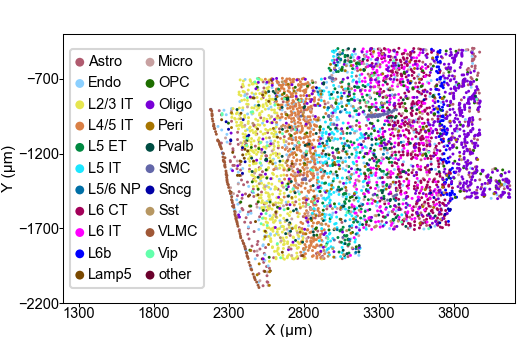

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\anndata\compat\_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [51]:
fig, ax = plt.subplots(figsize=(3.5,_single_col_width), dpi=150)

fig.subplots_adjust(left=0.12, right=0.98, bottom=0.1, top=0.9)

# select 
sel_exp_id = 2
adata_sub = merged_adata[merged_adata.obs['experiment'].isin([experiments[sel_exp_id]])]
adata_sub.uns['subclass_label_new_colors'] = [cmap_subclass[_sub_cls] for _sub_cls in np.unique(adata_sub.obs['subclass_label_new'])]    
sc.pl.scatter(adata_sub, x='center_x', y='center_y', color='subclass_label_new',
              size=8,
              ax=ax, 
              show=True)

ax.legend(ncol=2, loc=6, fontsize=_font_size, markerscale=3, 
          handletextpad=0.3, labelspacing=0.5, columnspacing=0.4, scatterpoints=1, prop={'size': 7})

plt.axis('equal')
ax.set_xlim([1300,4100])
ax.set_ylim([-2200, -400])

ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1], 500))
ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1], 500))

ax.set_xlabel(f"X (\u03BCm)", fontsize=_font_size, labelpad=1)
ax.set_ylabel(f"Y (\u03BCm)", fontsize=_font_size, labelpad=1)
ax.grid(False)
ax.tick_params('both', labelsize=_font_size-0.5, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    pad=0, labelleft=True, labelbottom=True) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
ax.set_title('')
fig.savefig(os.path.join(merfish_figure_folder, f'celltype_scatter_all_exp-{experiments[sel_exp_id]}.pdf'), 
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

# Scatter plot to Meng's data

In [42]:
meng_data_file = r'\\mendel\Mendel_SSD3\MERFISH_Analysis\Meng_data\counts.h5ad'
meng_data_raw = sc.read_h5ad(meng_data_file)

# load MERFISH labels from Meng
merfish_label = pd.read_csv(r'\\mendel\Mendel_SSD3\MERFISH_Analysis\Meng_data\cell_labels.csv', index_col=0)

# Combine and annotate the MERFISH data
meng_data = pd.DataFrame(meng_data_raw.X, index = meng_data_raw.obs.index, columns = meng_data_raw.var.index)
labels = merfish_label.loc[merfish_label['label']!='-1']

meng_data_raw.var['mean_counts'] = np.mean(meng_data,axis=0)

meng_data

index,1700022I11Rik,1810046K07Rik,5031425F14Rik,5730522E02Rik,Acta2,Adam2,Adamts2,Adamts4,Adra1b,Alk,...,Gad2,Tac2,Lamp5,Cnr1,Pvalb,Sst,Rab3b,Slc17a7,Penk,Gad1
index,,,,,,,,,,,,,,,,,,,,,
10000143038275111136124942858811168393,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.659448,0.000000,...,0.261892,0.262109,0.037601,0.010633,0.192950,0.079685,0.063194,0.613834,0.038716,0.000000
100001798412490480358118871918100400402,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.512115,0.225832,0.093828,0.000000,0.160687,0.171461,0.208027,0.618113,0.051407,0.000000
100006878605830627922364612565348097824,0.0,0.000000,0.0,0.000000,25.567039,0.0,0.000000,0.000000,0.000000,0.000000,...,0.199059,0.114653,0.000000,0.070231,0.144294,0.051351,0.148232,0.448829,0.041903,0.000000
100007228202835962319771548915451072492,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.240500,0.093413,0.033100,0.151837,0.197471,0.011399,0.110675,1.117577,0.016462,0.467554
100009332472089331948140672873134747603,0.0,0.491629,0.0,0.983257,0.491629,0.0,0.000000,0.000000,0.983257,0.000000,...,1.726676,0.533404,3.691514,0.000000,0.296567,0.748264,1.423427,11.386119,0.387408,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987465505639073211021560543065098772,0.0,0.000000,0.0,0.557620,0.000000,0.0,0.000000,0.000000,0.557620,2.788098,...,4.711612,1.145445,0.000000,0.362137,1.549598,0.195306,4.132728,1.586415,0.152228,8.515803
99989592830367590092304100078674096866,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.829112,14.632893,0.000000,...,0.354238,0.160562,0.630489,0.030634,0.073509,0.000000,0.210928,4.954309,0.140572,0.107833
99991756591196613545069880666241120777,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.944207,0.221704,0.139209,0.854429,0.296027,0.110999,0.432686,5.654802,0.042431,0.004518


In [48]:
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>


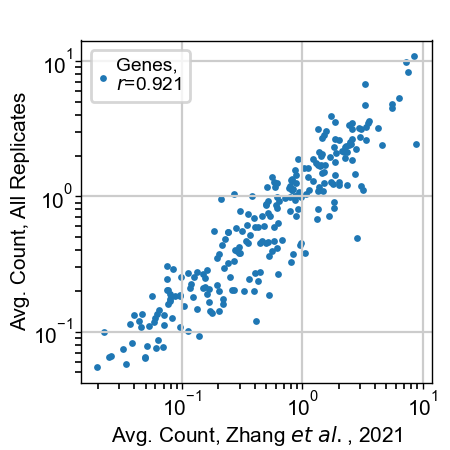

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [137]:
x, y = meng_data_raw.var['mean_counts'], adata_ori.var['mean_counts']

sel_x, sel_y = [], []
for _gene, _ct in  x.iteritems():
    if _gene in y and np.isfinite(_ct) and np.isfinite(np.log(y[_gene])) and np.isfinite(np.log(_ct)):
        sel_x.append(np.log(_ct))
        sel_y.append(np.log(y[_gene]))
sel_x = np.array(sel_x)
        
reg = LinearRegression().fit(sel_x[:,np.newaxis], sel_y)
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

ax = sns.scatterplot(x, y, ax=ax, linewidth=0, s=6)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_aspect('equal')
ax.set_xlabel("Avg. Count, Zhang $et$ $al.$, 2021", fontsize=_font_size, labelpad=1)
ax.set_ylabel("Avg. Count, All Replicates", fontsize=_font_size, labelpad=1)
# legend
l = ax.legend(labels=[f"Genes, \n$r$={np.sqrt(reg.score(sel_x[:,np.newaxis], sel_y)):.3f}"])
for _text in l.get_texts():
    _text.set_color([1-_c for _c in ax.get_facecolor()[:3]])
# ticks
ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                labelleft=True,
                pad=1, ) 
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    
plt.savefig(os.path.join(merfish_figure_folder, f'scatter_zhang2021_mergedMERFISH.pdf'), 
            dpi=300, transparent=True)
plt.show()

# SMARTSEQ

In [78]:
# define and load smartseq labeled file
smartseq_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\SMARTer_nuclei_MOp'
smartseq_file = os.path.join(smartseq_folder, 'MOp_smart_sn_labeled_20220707.h5ad')
smartseq_data = sc.read_h5ad(smartseq_file)

smartseq_data

AnnData object with n_obs × n_vars = 6171 × 10276
    obs: 'subclass_label', 'class_label', 'cluster_id', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'leiden', 'subclass_label_new', 'class_label_new', 'neuron_identity'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'class_label_colors', 'hvg', 'leiden', 'leiden_colors', 'neighbors', 'pca', 'subclass_label_colors', 'subclass_label_new_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [101]:
reg = LinearRegression().fit(np.log(sel_x+1)[:,np.newaxis], np.log(sel_y))
print(reg.coef_, reg.intercept_)

[0.99680876] -1.5928832369955006


In [102]:
reg.score(np.log(sel_x+1)[:,np.newaxis], np.log(sel_y))

0.6006437801420125

# Bulk sequencing

In [95]:
bulk_seq_df = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\SequencingRef\M1_bulk_all.csv').set_index('Unnamed: 0')

C:\Users\puzheng\AppData\Local\Temp/ipykernel_15972/1710948321.py:6: RuntimeWarning: divide by zero encountered in log
  if _gene in y and np.isfinite(_ct) and np.isfinite(np.log(y[_gene])) and np.isfinite(np.log(_ct)):


<IPython.core.display.Javascript object>


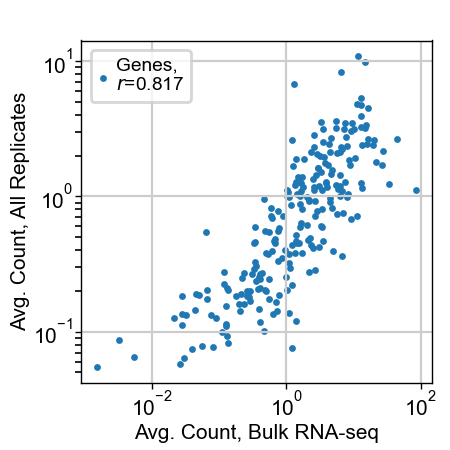

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [136]:
x, y = bulk_seq_df['average'], adata_ori.var['mean_counts']


sel_x, sel_y = [], []
for _gene, _ct in  x.iteritems():
    if _gene in y and np.isfinite(_ct) and np.isfinite(np.log(y[_gene])) and np.isfinite(np.log(_ct)):
        sel_x.append(np.log(_ct))
        sel_y.append(np.log(y[_gene]))
sel_x = np.array(sel_x)
        
reg = LinearRegression().fit(sel_x[:,np.newaxis], sel_y)

# Plot
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

ax = sns.scatterplot(x, y, ax=ax, linewidth=0, s=6)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_aspect('equal')
ax.set_xlabel("Avg. Count, Bulk RNA-seq", fontsize=_font_size, labelpad=1)
ax.set_ylabel("Avg. Count, All Replicates", fontsize=_font_size, labelpad=1)
# legend
l = ax.legend(labels=[f"Genes, \n$r$={np.sqrt(reg.score(sel_x[:,np.newaxis], sel_y)):.3f}"])
for _text in l.get_texts():
    _text.set_color([1-_c for _c in ax.get_facecolor()[:3]])
# ticks
ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                labelleft=True,
                pad=1, ) 
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    
plt.savefig(os.path.join(merfish_figure_folder, f'scatter_Bulk_mergedMERFISH.pdf'), 
            dpi=300, transparent=True)
plt.show()

## between replicates

In [139]:
adata_rep1 = sc.read_h5ad(r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\v2\20220415-storm65\PostAnalysis\manual_labeled_data.h5ad')
adata_rep2 = sc.read_h5ad(r'\\10.245.74.158\Chromatin_NAS_8\MERFISH\v2\20220418-storm6\PostAnalysis\filtered_cluster_data.h5ad')


<IPython.core.display.Javascript object>


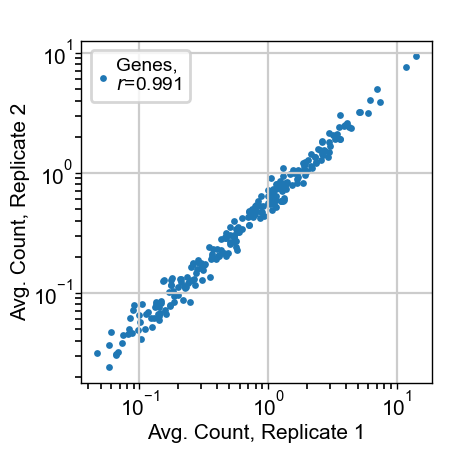

E:\Users\puzheng\anaconda3\envs\ia3_postanalysis\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [141]:
x, y = adata_rep1.var['mean_counts'], adata_rep2.var['mean_counts']

sel_x, sel_y = [], []
for _gene, _ct in  x.iteritems():
    if _gene in y and np.isfinite(_ct) and np.isfinite(np.log(y[_gene])) and np.isfinite(np.log(_ct)):
        sel_x.append(np.log(_ct))
        sel_y.append(np.log(y[_gene]))
sel_x = np.array(sel_x)
        
reg = LinearRegression().fit(sel_x[:,np.newaxis], sel_y)

# Plot
fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)

ax = sns.scatterplot(x, y, ax=ax, linewidth=0, s=6)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_aspect('equal')
ax.set_xlabel("Avg. Count, Replicate 1", fontsize=_font_size, labelpad=1)
ax.set_ylabel("Avg. Count, Replicate 2", fontsize=_font_size, labelpad=1)
# legend
l = ax.legend(labels=[f"Genes, \n$r$={np.sqrt(reg.score(sel_x[:,np.newaxis], sel_y)):.3f}"])
for _text in l.get_texts():
    _text.set_color([1-_c for _c in ax.get_facecolor()[:3]])
# ticks
ax.tick_params('both', labelsize=_font_size, 
                width=_ticklabel_width, length=_ticklabel_size,
                labelleft=True,
                pad=1, ) 
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    
plt.savefig(os.path.join(merfish_figure_folder, f'scatter_between_replicates.pdf'), 
            dpi=300, transparent=True)
plt.show()